# Graph Results of Algorithm
BS"D

In [1]:
import seaborn as sns
import pandas as pd

## Load the Data

In [28]:
num_agents = [4, 8, 12, 16, 20]

success_rates_empty = {
    'Disjoint': [25, 25, 25, 24, 19],
    'Standard': [25, 25, 25, 22, 10],
    'MAC CBS': [25, 25, 25, 20, 5],
}

nodes_expanded_empty = {
    'Disjoint': [2.08, 4.72, 30.80, 210.90, 307.40],
    'Standard': [2.12, 5.00, 41.88, 1481.85, 4819.40],
    'MAC CBS': [2.12, 5.00, 39.28, 854.90, 1875.80],
}

nodes_expanded_empty

{'Disjoint': [2.08, 4.72, 30.8, 210.9, 307.4],
 'Standard': [2.12, 5.0, 41.88, 1481.85, 4819.4],
 'MAC CBS': [2.12, 5.0, 39.28, 854.9, 1875.8]}

### Smooth Data
Convert the data to percentages.

In [25]:
def convert_to_percentages(lis, total):
    return [x / total for x in lis]

success_rates_empty_ratio = {k: convert_to_percentages(v, 25) for k, v in success_rates_empty.items()}

## Plot the Data
Plot the data as a line graph.

In [30]:
def plot_as_line_chart(data, title, filename, x_tics = None):
    '''
    Plots the given data as a line chart

    :param data: dictionary of data to plot
    :param title: title of the plot
    :param filename: filename to save the plot
    :param x_tics: labels for the x axis

    :return: None

    Will save the plot as a file
    '''
    df = pd.DataFrame(data, index=x_tics)
    sns.set_style("whitegrid")
    sns.set_context("paper")
    ax = sns.lineplot(data=df)
    ax.set_title(title)
    ax.set_ylabel('Success Rate')
    ax.set_xlabel('Number of Agents')

    # Assert that the output directory exists
    import os
    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))

    ax.figure.savefig(filename)

def plot_nodes_expanded(data, title, filename, x_tics = None):
    '''
    Plots the given data as a line chart

    :param data: dictionary of data to plot
    :param title: title of the plot
    :param filename: filename to save the plot
    :param x_tics: labels for the x axis

    :return: None

    Will save the plot as a file
    '''
    df = pd.DataFrame(data, index=x_tics)
    sns.set_style("whitegrid")
    sns.set_context("paper")
    ax = sns.lineplot(data=df)
    ax.set_title(title)
    ax.set_ylabel('Nodes Expanded')
    ax.set_xlabel('Number of Agents')

    # Assert that the output directory exists
    import os
    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))

    ax.figure.savefig(filename)

### Plot the Graphs

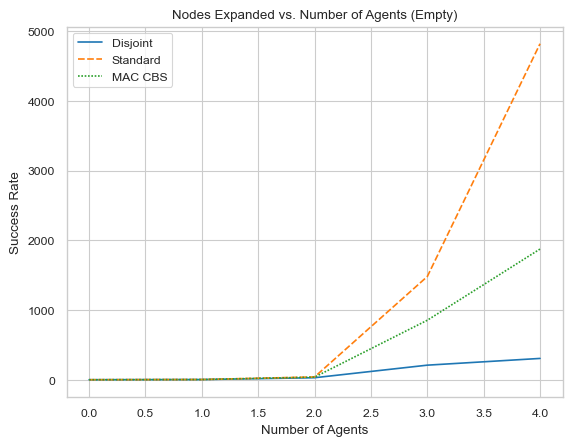

In [33]:
# Plot nodes expanded
plot_as_line_chart(nodes_expanded_empty, 'Nodes Expanded vs. Number of Agents (Empty)', 'plots/nodes_expanded_empty.png')